# An investigation into the life expectancy of smokers:

### Aim:

***

The aim of this project is to investigate the habits of smokers and thus the effects of smoking on the national population of smokers in Ireland. The hope is to isolate the factors that most affect the outcome for a given case, and to generate an algorithm that can best emulate a small sample of the real-life population.

***

In [1]:
# Import everything you might need later on:

import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.default_rng()

### Investigation:

***

Initially I begun my investigation into the matter based upon certain assumptions that I would then either prove right, wrong, or refine.

I decided that the most interesting variable in relation to this data was (L): the life expectancy of a given smoker; thus, the task was to find a way of calculating an average life expectancy for a given smoker.

I assumed that the main factors that would affect a smoker’s life expectancy would be (A): Number of cigarettes smoked a day (average), (B): Age that the person started and (C): If they gave up, and if so, at what age.

Firstly, I just needed to gather up as much raw information as I could so as to formulate a better understanding of the effects of smoking on the general population as a whole. What I found was the following information:

Smoking is the second most prevalent cause of death in the world, succeeded only by high blood pressure. [17]

According to ‘Our World in Data’, “Every seventh death in the world (13%) was the result of direct smoking in 2017; a further 2% was the result of second-hand smoke. This means 15% – close to 1-in-6 deaths was the result of tobacco”.

***

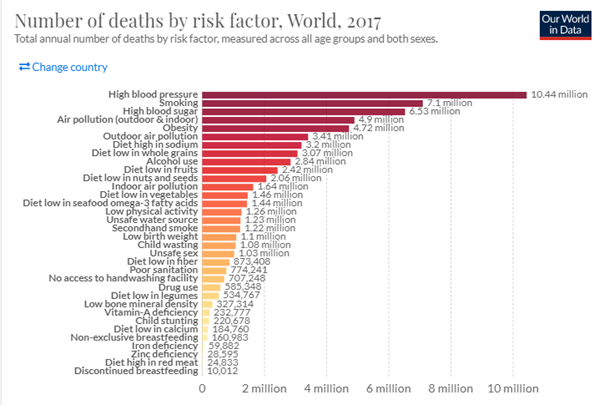

***

With China and Greenland seemingly having the worst rates of deaths from smoking in the world, with almost 1 in 4 deaths being related to smoking. [17]

***

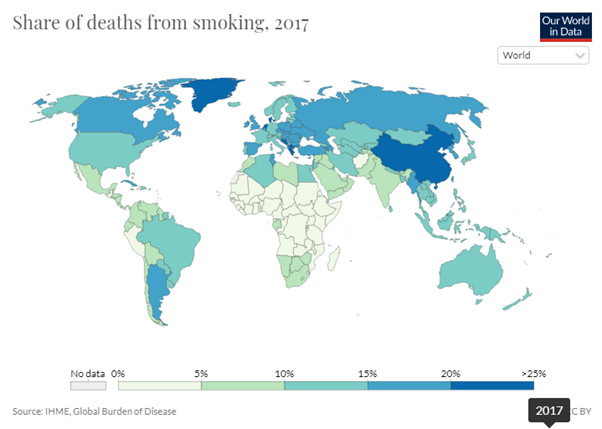

***

Most smoking related deaths affect people in their later years of life:

***

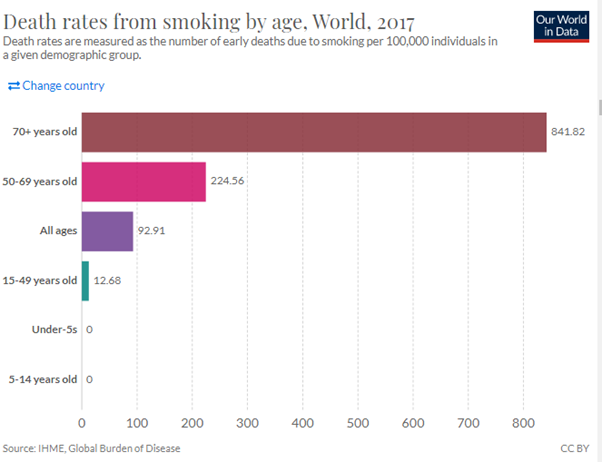

***

And thus, here we are already beginning to see some sort of visualisation of the outcome variable (L) and how it should look if replicated.

***

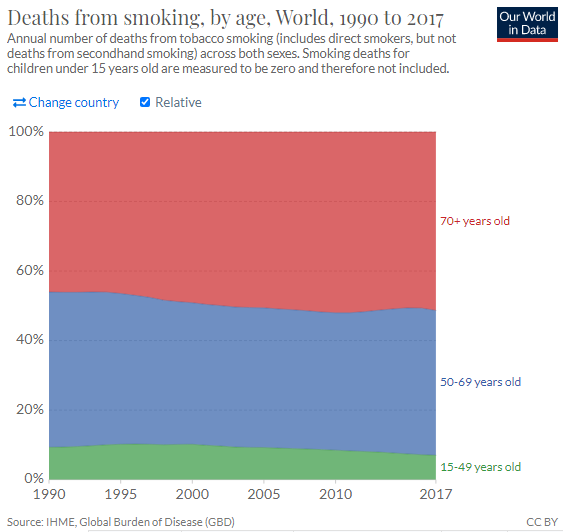

***

Another factor that must be taken into account is gender. According to the same source “more than one-third (35%) of men in the world smoke. Just over 6% of women do.” This will most likely mean that any dataset generated will have to take gender into account as an independent variable, and this variable should reflect the distribution of smoking across both genders.

***

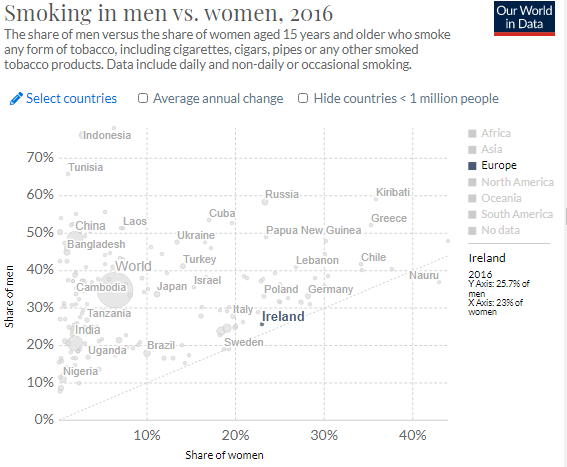

***

However, Ireland seems to be somewhat of an outlier, with women unfortunately achieving the poison chalice of gender equality in their ability to almost match men’s smoking fully, with 54.1% of smokers being male and 45.9% female (According to the HSE) [19]. And so, we have our gender variable distribution (G).

***

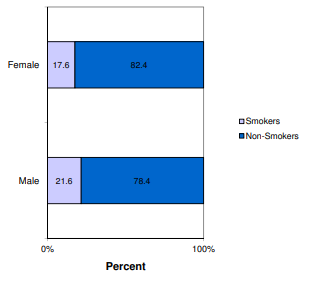

In [2]:
G = rng.choice(["male","Female"], 100, p=(0.54, 0.46))
G

array(['male', 'male', 'Female', 'male', 'male', 'male', 'male', 'Female',
       'male', 'Female', 'Female', 'male', 'male', 'Female', 'Female',
       'Female', 'male', 'male', 'male', 'male', 'Female', 'Female',
       'Female', 'male', 'male', 'male', 'male', 'Female', 'male', 'male',
       'Female', 'male', 'Female', 'male', 'Female', 'Female', 'male',
       'male', 'Female', 'male', 'male', 'Female', 'male', 'Female',
       'male', 'male', 'Female', 'Female', 'male', 'Female', 'Female',
       'Female', 'Female', 'male', 'Female', 'male', 'male', 'male',
       'male', 'Female', 'Female', 'Female', 'male', 'Female', 'Female',
       'male', 'Female', 'male', 'male', 'male', 'male', 'Female',
       'Female', 'male', 'male', 'Female', 'Female', 'Female', 'male',
       'male', 'male', 'male', 'male', 'male', 'Female', 'Female',
       'Female', 'male', 'Female', 'Female', 'Female', 'male', 'male',
       'male', 'male', 'male', 'male', 'Female', 'male', 'male'],
      dtype='<U

***

In the same article I was able to find this data, which describes the number of smokers by age. Using this data, we should be able to extract some of the information needed for the other variables’ probability distributions:

***

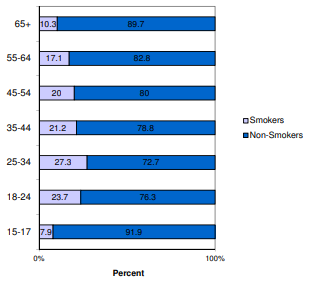

***

For instance, here we can see that people seem to begin smoking between the ages of 15-34, (with the majority starting around 18) with numbers steadily dropping thereafter (Either due to quitting or death). This will allow us to come up with a model for (B). So, based on the above figure we will have to generate three separate arrays, each representing a portion of the starting ages, with the probability distributed accordingly amongst them. 

So, for the first array: (Ages 25-34): 27.3 – 23.7 = 3.6, (divided by 27.3) X 100 = 13%. 

Second array: (Ages 18 – 24): 23.7-7.9 = 15.8, (divided by 27.3) X 100 = 58%

Third array: (Ages15-17): 100 – (58 + 13) = 29%

We can then concatenate these three arrays to generate a complete array of starting ages that accurately reflects the real-life distribution of starting ages in the Irish population.

***

In [3]:
# Take probability distribution as set by above data and generate
# proportionate amounts of examples from each array, then join together.

a = np.array([15, 16, 17])
b = np.array([18, 19, 20, 21, 22, 23, 24])
c = np.array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

ax = rng.choice(a, size=29)
bx = rng.choice(b, size=58)
cx = rng.choice(c, size=13)

Strt = np.concatenate((ax, bx, cx), axis=0)
Strt

array([17, 17, 17, 15, 17, 17, 15, 15, 17, 15, 16, 15, 17, 16, 16, 15, 16,
       17, 17, 16, 17, 17, 16, 15, 17, 15, 16, 15, 15, 24, 22, 18, 22, 22,
       24, 22, 21, 23, 20, 18, 22, 21, 19, 22, 19, 20, 24, 22, 21, 19, 22,
       19, 24, 18, 23, 24, 19, 24, 19, 21, 21, 20, 23, 21, 22, 22, 24, 20,
       24, 23, 20, 23, 23, 23, 23, 22, 18, 20, 24, 22, 21, 18, 24, 20, 20,
       18, 19, 33, 30, 32, 28, 29, 27, 34, 29, 31, 25, 28, 25, 30])

(array([17., 18., 15., 19., 18.,  2.,  3.,  4.,  2.,  2.]),
 array([15. , 16.9, 18.8, 20.7, 22.6, 24.5, 26.4, 28.3, 30.2, 32.1, 34. ]),
 <a list of 10 Patch objects>)

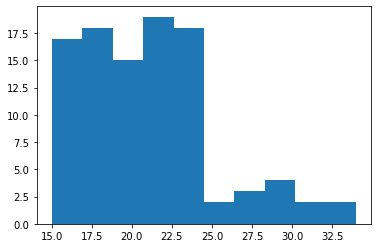

In [4]:
plt.hist(Strt)

***

Thus we have defined our variable (Strt) - Distribution of Ages Started.
***
The next variable to define is the number of cigarettes smoked. According to the HSE the distribution of cigarette smoking is as follows:

***

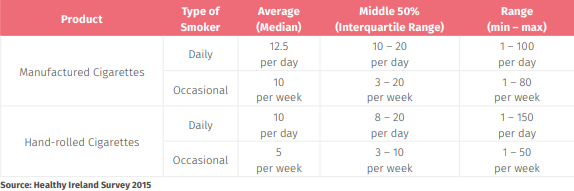

***
With the different types of tobacco smoked as follows:
***

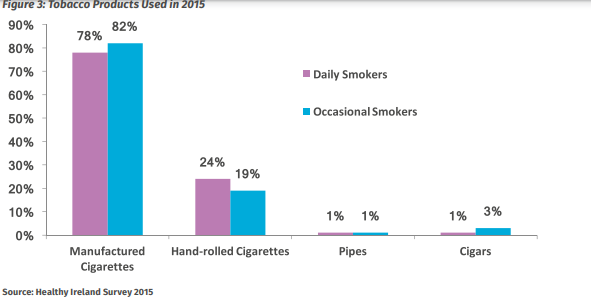

***
Since the difference in effects on health based on type of tobacco product smoked seems to be an area of much debate, I categorise every smoker based on the info of the majority, which is manufactured cigarettes.

Upon experimenting with different distributions based on the information above, the best model I could create to emulate the data using a random number generator was as follows:
***

In [5]:
# take mean as 12.5 and stndard deviation as around half of IQ range:
d = np.random.normal(12.5, 5, 100)

# Turn all negative numbers generated positive:
e = abs(d)
e
np.sort(e)

array([ 1.20512687,  2.40284485,  2.53777524,  4.97794907,  5.22788285,
        5.32688553,  5.48024944,  5.53348909,  5.54337959,  5.62895342,
        5.79453726,  5.82112026,  6.09564276,  6.17904394,  7.19632078,
        7.54283741,  7.62294575,  8.12437556,  8.16729864,  8.22391723,
        8.29322314,  8.34790118,  8.52298388,  8.52322054,  8.76850724,
        9.3967219 ,  9.63888763,  9.6478423 , 10.31299764, 10.36595001,
       10.38102328, 10.59818159, 10.76626829, 10.76753179, 10.78447117,
       10.81823434, 10.94752662, 10.9858829 , 11.0853294 , 11.25088803,
       11.44177046, 11.5071316 , 11.56024676, 11.62320541, 11.62700544,
       11.80020274, 12.17189895, 12.1961868 , 12.28519676, 12.67451607,
       12.77530529, 12.85619459, 12.86661203, 12.91756855, 13.11780458,
       13.29531431, 13.31944121, 13.34404921, 13.38236683, 13.43598417,
       13.49797305, 13.55380314, 13.59902551, 13.87157319, 14.03149972,
       14.47424307, 14.49733368, 14.54883435, 14.84084585, 14.94

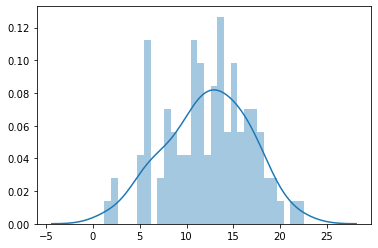

In [6]:
sns.distplot(e, bins=30)

***
Unfortunately, although the curve represents the majority of smokers quite well, I was unable to find a way of defining the range to be 0-100. I recognise that this is a clear limitation to the model, as it will not generate data to represent the few outliers that smoke above 50 cigarettes without skewing the median and warping the distribution to accommodate the minority. I am sure that with a better knowledge of statistics I would be able to fix this, but for now this is as close as I can get to the real-world data for variable (A) in a single script. However, based on the following data from the HSE:

> -“36% of all smokers were regular smokers (11-20 cigarettes per day), while 59.2% were occasional to light smokers (10 or less cigarettes per day) with 4.8% being heavy smokers (21+ cigarettes per day)”. [19]

I will assume that the 4.8% of heavy smokers can be represented on a uniform distribution. One thing I can do to compensate for this minority is to take the number of sample smokers generated by the above script and reduce it by 5 (4.8 rounded up) and generate an evenly distributed array of numbers between 21-100 to represent the heavy smokers minority portion.
***

In [7]:
# mid to low level smokers:
d = np.random.normal(12.5, 5, 95)
e = abs(d)

# Heavy smokers:
f = np.random.uniform(21, 100, 5)

# Join arrays to get variable A: Number of cigarettes
Num = np.concatenate((e, f), axis=0)


# View in order for convenience:
np.sort(Num)

array([ 3.15821744,  3.31106232,  3.916969  ,  4.1495969 ,  4.41793298,
        5.53167568,  5.56835441,  6.07973815,  6.72548384,  7.03330734,
        7.60978474,  8.0511025 ,  8.05443109,  8.33037642,  8.41723172,
        8.46692748,  8.63714287,  8.65552334,  8.8039351 ,  8.88378916,
        8.89280036,  9.11368146,  9.40226852,  9.64011399,  9.78548596,
        9.85257143,  9.91555526, 10.0840691 , 10.22792536, 10.30236741,
       10.55731472, 10.86921817, 11.03340046, 11.09255063, 11.10298171,
       11.47496391, 11.50591742, 11.60064913, 11.60742607, 11.71621909,
       11.94822564, 12.01385078, 12.01431161, 12.02748059, 12.06438038,
       12.14915615, 12.37302603, 12.38446553, 12.46991457, 12.83892936,
       13.18239127, 13.22151252, 13.32160319, 13.41864283, 13.52420385,
       13.60961669, 13.75086692, 13.77814974, 14.04185049, 14.05244424,
       14.17238511, 14.19829621, 14.92253011, 15.47481666, 15.6757629 ,
       15.82822735, 15.8333254 , 15.8503444 , 15.86025619, 16.14

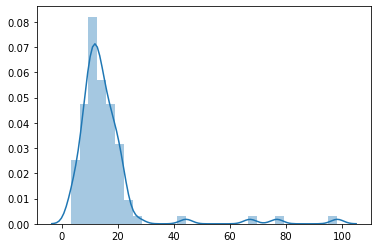

In [8]:
sns.distplot(Num, bins=30)

***
After a long period of research and deliberation, I decided it was best to base the effects of this variable on an algorithm derived from a number of other studies that were brought together by the NCBI to calculate an average loss of life of 11 minutes per cigarette. [1] [2] [3] [4] [5] [6] [7] [8] [9]

There are 525,600 minutes in a year.

1 cigarette a day, at a loss of 11 minutes a day, amounts to 4,004 minutes a year. 

Multiply the number of cigarettes smoked in a day by 4004 and divide that number by 525,600 and you get the percentage of each year that is lost -PerYr.

if we take the age they started, subtract it from the national average:
>New data from the Department of Health reveals that the average life expectancy in Ireland is now 84 years for women and 80.4 years for men. [20]

...We get YrsSmkr, and then calculate the total time lost across all years we get the expected amount of time lost from smoking.

PerYr * YrsSmkr =  Time lost.

If we subtract this result from the national average according to their gender we should get an average age for someone with this specific smoking habit to die.
***

In [9]:
PerYr = ((Num * 4004) / 525600)
PerYr

array([0.05123447, 0.04214009, 0.13899016, 0.12057881, 0.02405918,
       0.13303773, 0.14793819, 0.12335404, 0.06706803, 0.15427902,
       0.11788654, 0.15369172, 0.15656036, 0.10367752, 0.06412214,
       0.15394141, 0.09255179, 0.12545966, 0.12296884, 0.06135834,
       0.10816206, 0.14122724, 0.08925369, 0.16995737, 0.14639594,
       0.09434437, 0.06450072, 0.12061765, 0.03161146, 0.09102111,
       0.12870671, 0.08837329, 0.07553631, 0.08842491, 0.10302685,
       0.09499532, 0.07454544, 0.10705096, 0.07791593, 0.08280127,
       0.17037572, 0.0750565 , 0.05797104, 0.02983931, 0.09152455,
       0.08765162, 0.067745  , 0.10697026, 0.10796467, 0.1208228 ,
       0.14713944, 0.08042521, 0.0463152 , 0.16362007, 0.10042294,
       0.05357946, 0.07343801, 0.03365564, 0.16602982, 0.06767635,
       0.10148345, 0.06346048, 0.0424195 , 0.14397632, 0.08405201,
       0.06593743, 0.10072096, 0.06942766, 0.12819939, 0.11941734,
       0.17242718, 0.13406086, 0.06133298, 0.09162487, 0.14088

***
The next variable is whether people gave up, and if so at what age? According to CDC.Gov:
>-“ In 2018, 61.7% of adult smokers (55.0 million adults) who ever smoked had quit.”

And according to this study [16] there is an average reduction of life loss depending on the age you give up:
>-“Cessation at age 60, 50, 40, or 30 years gained, respectively, about 3, 6, 9, or 10 years of life expectancy.”

Thus we can create a categorical approach to this variable. 62% chance of yes, the person gave up, and if so randomly generate an age from list (30, 40, 50, 60) with respective reductions of the overall loss of life applied to the result accordingly, otherwise it has no efect.
***

In [10]:
j = rng.choice((30, 40, 50, 60), 62)
k = np.zeros(38)

Quit = np.concatenate((j, k), axis=0)
Quit

array([50., 60., 30., 60., 30., 60., 40., 50., 60., 60., 40., 40., 30.,
       60., 50., 30., 30., 50., 40., 60., 30., 30., 30., 60., 50., 50.,
       50., 30., 40., 60., 60., 60., 30., 60., 30., 50., 50., 30., 50.,
       40., 50., 40., 50., 40., 30., 50., 40., 50., 60., 50., 50., 60.,
       30., 40., 50., 50., 50., 30., 40., 30., 30., 30.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

***
So now our arrays to be used in our dataset are as follows:

G = Gender

Strt = Age started smoking

Num = Number of cigarettes smoked per day

Quit = Whether or not the person quit, and if so at what age.

L = Life expectancy calculted using the above criteria.
***
